# PyTorch Computer Vision

## 0. computer vision libraries in Pytorch

* `torchVision`- base domain library for Pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision modals
* `torchvision.modals` -  functions  for getting pretrained models
* `torchvision.transforms` - functions for manipulating vision dasta (images) to be suitable for use with ML models
* `torch.utils.data.DataLoader`-  Creates a Python iterable a dataset

In [1]:
# import Pytorch 
import torch
from torch import nn

# Import  torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


# Import matplotlib for visualization
import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)


2.2.1+cu121
0.17.1+cpu


## 1. Getting a dataset

the dataset we'll be using is FashionMNIST from torchvision.datasets 

In [2]:

# setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download the data to?
    train=True, # do we want the training dataset?
    download=True,
    transform=ToTensor(), # How de we want the transform the data?
    target_transform=None # how de we want tot transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None

)


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## 1. Check Input and output shapes of data

In [8]:
#Check Input and output shape
print(f"Image shape: {image.shape} -> [colour channels, height, width]")
print(f"Image labels: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [colour channels, height, width]
Image labels: Ankle boot


## 1.2 Visualizing our data

Image shape torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

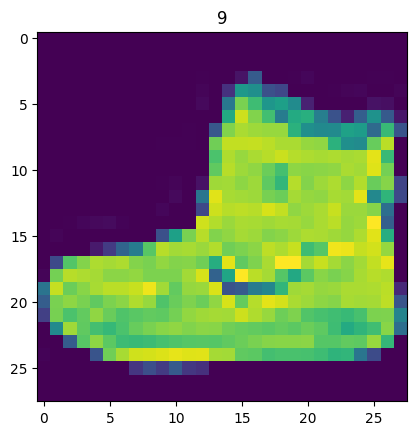

In [11]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

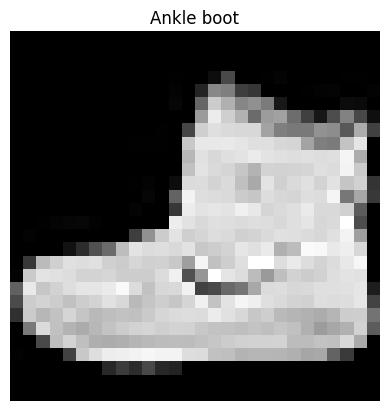

In [14]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

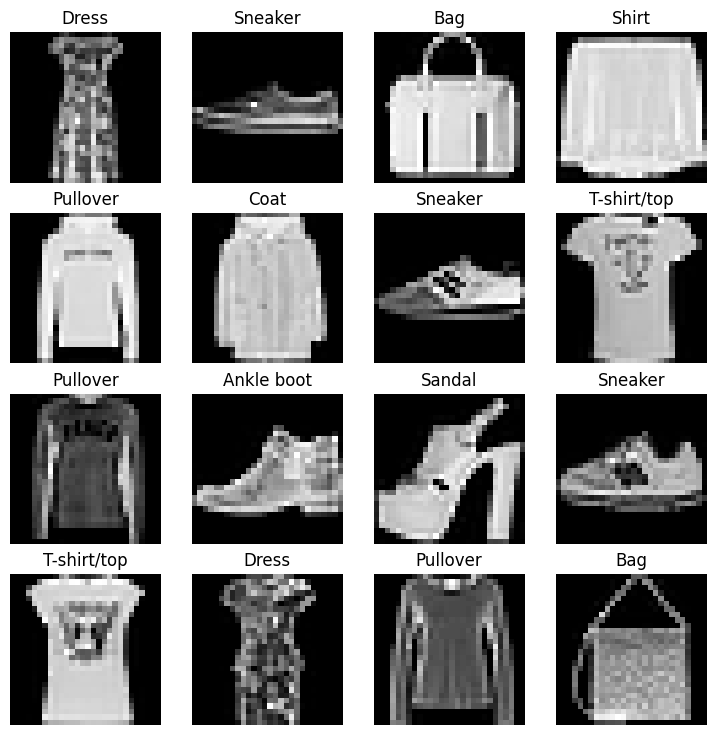

In [20]:
# Plot more images
torch.manual_seed(4)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)


Do you think these items of clothing (images) could be modelled with pure linear lines? or do we'll need non-linearites?

## 2. Prepare the Dataloader
Right now, our data is in the form Pytorch datasets

Dataloader turns our datssets into Pytorch iterable

More Specifically, we want to turn our data into batches (or mini-batches)

Why we would do this?

1. It is more computationally efficient, as in your computing hardware may not be able to look (store in memory) at 60000 images in one  hit. So we break it down to 32 images at a time (batch size of 32)

2. It gives our neural network more chances to update its gradient its gradient per epcoh

here is the one slide to explain this

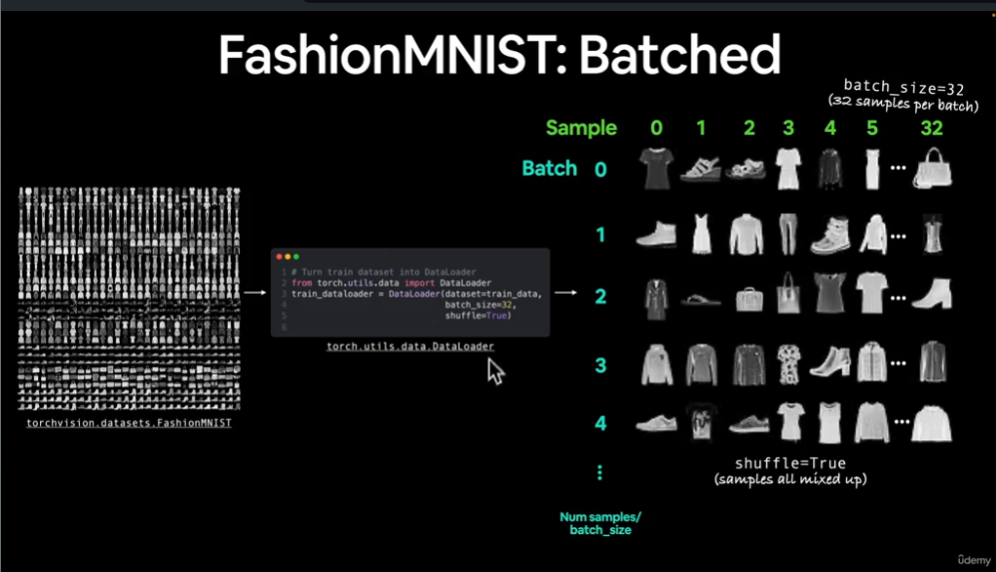